# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/steveferenzi/Desktop/UVA MSDS/courses/5030 Understanding Uncertainty/data/nhanes_data_17_18.csv')
df

/var/folders/_j/g3w6_07d0b9gfphnq_607h_40000gn/T/ipykernel_79778/651202582.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/steveferenzi/Desktop/UVA MSDS/courses/5030 Understanding Uncertainty/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identify categorial variables 

In [46]:
categorical_variables = df.select_dtypes(include='object').columns
print(categorical_variables)

Index(['GeneralHealthCondition', 'TypeOfMilkFirstFedWholeMilk',
       'HowHealthyIsTheDiet', 'Past30DayMilkProductConsumption',
       'YouDrinkWholeOrRegularMilk', 'RegularMilkUse5TimesPerWeek',
       'HowOftenDrankMilkAge512', 'HowOftenDrankMilkAge1317',
       'HowOftenDrankMilkAge1835', 'SchoolLunchFreeReducedOrFullPrice',
       'SchoolBreakfastFreereducedfullPrice',
       'SummerProgramMealFreereducedPrice',
       'UsualSleepTimeOnWeekdaysOrWorkdays',
       'UsualWakeTimeOnWeekdaysOrWorkdays', 'HowOftenDoYouSnore',
       'HowOftenFeelOverlySleepyDuringDay',
       'DifficultyTheseProblemsHaveCaused', 'DifficultyManagingMoney',
       'Gender', 'RacehispanicOrigin', 'RacehispanicOriginWNhAsian',
       'ServedActiveDutyInUsArmedForces', 'EducationLevelChildrenyouth619',
       'EducationLevelAdults20', 'MaritalStatus',
       'TotalNumberOfPeopleInTheHousehold', 'TotalNumberOfPeopleInTheFamily',
       'OfChildren5YearsOrYoungerInHh', 'OfChildren617YearsOldInHh',
       'OfA

## Choose variables (GeneralHealthCondition, HowOftenDrankMilkAge512) and inspect for missing values.

In [47]:
missing_values = df[['GeneralHealthCondition', 'HowOftenDrankMilkAge512']].isnull().sum()
non_missing_values = df[['GeneralHealthCondition', 'HowOftenDrankMilkAge512']].notnull().sum()

table = pd.DataFrame({
    'Variable': ['GeneralHealthCondition', 'HowOftenDrankMilkAge512'],
    'Missing': missing_values,
    'Non-Missing': non_missing_values
})

print(table)

                                        Variable  Missing  Non-Missing
GeneralHealthCondition    GeneralHealthCondition     2402         5964
HowOftenDrankMilkAge512  HowOftenDrankMilkAge512     4557         3809


Thoughts on missing vs. non-missing values: this data set is terrible. Missing values for GeneralHealthCondition are almost 30% of its total data. Even worse, the missing values for HowOftenDrankMilkAge512 account for almost 55% of its data.

In [48]:
## contingency table

ctable = pd.crosstab(df["GeneralHealthCondition"], df["HowOftenDrankMilkAge512"])

print(ctable)

HowOftenDrankMilkAge512  Never  Often-once a day or more  \
GeneralHealthCondition                                     
Excellent                    6                       237   
Fair or                     24                       575   
Good                        49                      1106   
Poor?                        4                        81   
Very good                   10                       665   

HowOftenDrankMilkAge512  Rarely-less than once a week  \
GeneralHealthCondition                                  
Excellent                                          17   
Fair or                                            63   
Good                                               69   
Poor?                                              10   
Very good                                          26   

HowOftenDrankMilkAge512  Sometimes-once a week or more but less than once a day  \
GeneralHealthCondition                                                            
Excellent    

I could not extract any insight directly from the contingency tables so I plotted using a bar chart and stacked bar chart. It appears people who drank milk "often - once a day or more" dominate the data, so this suggests that frequent milk-drinking was the most common childhood pattern. However, the stacked bar chart shows that people across all health categories show the same patterns (where “Often” dominates). As proportions across all categories look mostly similar, there is no obvious trend between general health rating later in life and milk drinking from ages 5-12.

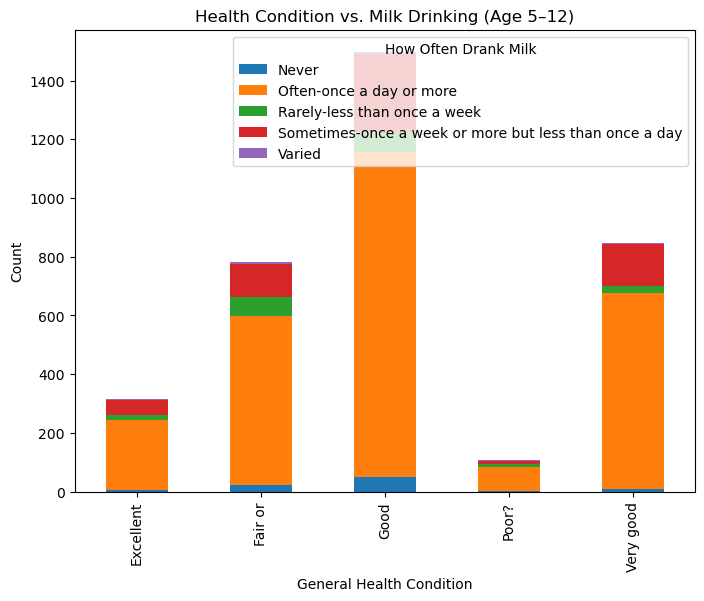

In [53]:
# Plot as a stacked bar chart
ctable.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Health Condition vs. Milk Drinking (Age 5–12)")
plt.xlabel("General Health Condition")
plt.ylabel("Count")
plt.legend(title="How Often Drank Milk")
plt.show()

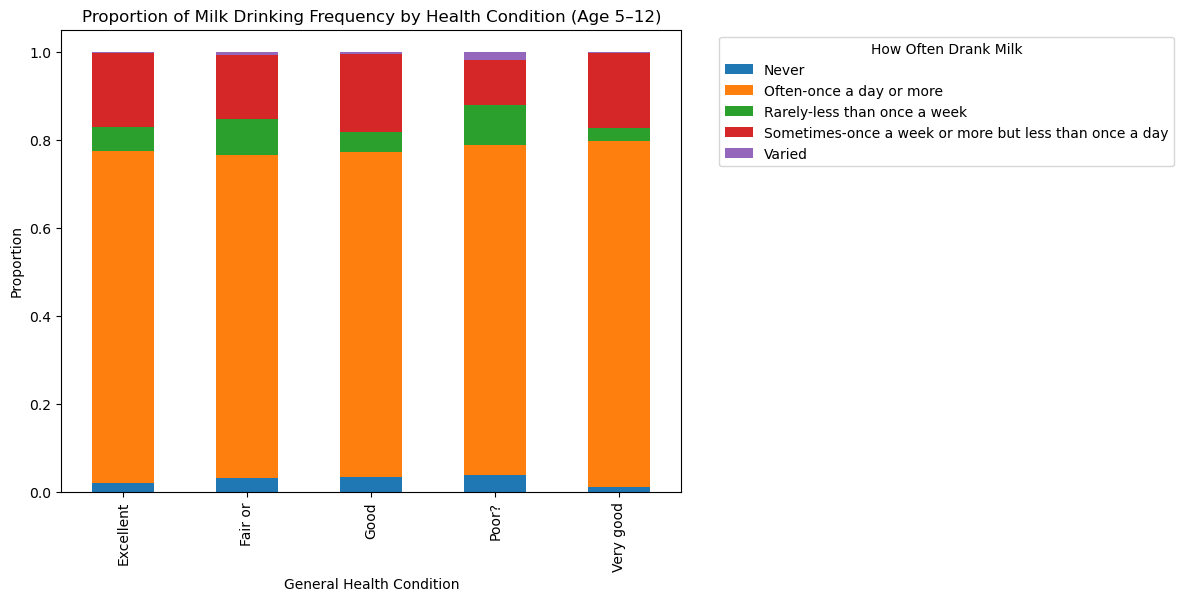

In [ ]:
# Normalize row-wise to proportions
prop_ctable = ctable.div(ctable.sum(axis=1), axis=0)

# Plot stacked bar chart
prop_ctable.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Proportion of Milk Drinking Frequency by Health Condition (Age 5–12)")
plt.xlabel("General Health Condition")
plt.ylabel("Proportion")
plt.legend(title="How Often Drank Milk", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

## Identify numeric variables 

In [30]:
numeric_variables = df.select_dtypes(include='number').columns
print(numeric_variables)

Index(['SEQN', 'EverBreastfedOrFedBreastmilk', 'AgeStoppedBreastfeedingdays',
       'AgeFirstFedFormuladays', 'AgeStoppedReceivingFormuladays',
       'AgeStartedOtherFoodbeverage', 'AgeFirstFedMilkdays',
       'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk',
       'TypeOfMilkFirstFedFatFreeMilk',
       ...
       'SmokedAtLeast100CigarettesInLife',
       'AgeStartedSmokingCigarettesRegularly',
       'DaysSmokedCigsDuringPast30Days', 'AvgCigarettesdayDuringPast30Days',
       'TriedToQuitSmoking', 'TimesStoppedSmokingCigarettes',
       'HowLongWereYouAbleToStopSmoking', 'CurrentSelfreportedHeightInches',
       'CurrentSelfreportedWeightPounds', 'TriedToLoseWeightInPastYear'],
      dtype='object', length=162)


## Choose variables (GeneralHealthCondition, AgeStoppedBreastfeedingdays) and inspect for missing values.

In [44]:
missing_values = df[['GeneralHealthCondition', 'AgeStoppedBreastfeedingdays']].isnull().sum()
non_missing_values = df[['GeneralHealthCondition', 'AgeStoppedBreastfeedingdays']].notnull().sum()

table = pd.DataFrame({
    'Variable': ['GeneralHealthCondition', 'AgeStoppedBreastfeedingdays'],
    'Missing': missing_values,
    'Non-Missing': non_missing_values
})

print(table)

                                                Variable  Missing  Non-Missing
GeneralHealthCondition            GeneralHealthCondition     2402         5964
AgeStoppedBreastfeedingdays  AgeStoppedBreastfeedingdays     7504          862


Thoughts on missing vs. non-missing values: these data are better than the previous. Missing values for GeneralHealthCondition are again almost 30% of the variable's total data. However, the missing values for AgeStoppedBreastfeedingdays only account for 13% of the variable's total data.

In [ ]:
desc_table = df.groupby("GeneralHealthCondition")["AgeStoppedBreastfeedingdays"].describe()
print(desc_table)


                        count  mean  std  min  25%  50%  75%  max
GeneralHealthCondition                                           
Excellent                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Fair or                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Good                      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Poor?                     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Very good                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


I ran into multiple problems trying to develop the description table (see next few code blocks and results). The zero counts and "NaN" were the obvious error flags, so I first attempted to coerce the breastfeeding column to numeric if not fully numeric (due to mixed data types). I also tried to clean the general health condition data as I noticed weird characters like "?". As I condinued getting errors, I noticed the counts of GeneralHealthCondition (8366) and AgeStoppedBreastfeedingdays (862) were unequal. 

I eventually discovered (with ChatGPT assist) that the respondents who reported breastfeeding duration do not have a recorded GeneralHealthCondition, and vice versa. You can’t directly cross-tab AgeStoppedBreastfeedingdays vs GeneralHealthCondition because the survey design didn’t collect them together for the same respondents -- there is no overlap. Therefore, we cannot explore this research question about the relationship betweeen childhood breastfeeding and health.

In [ ]:
# Force conversion to numeric, turn bad values into NaN
df["AgeStoppedBreastfeedingdays"] = pd.to_numeric(df["AgeStoppedBreastfeedingdays"], errors="coerce")

# New descriptive table
desc_table = df.groupby("GeneralHealthCondition")["AgeStoppedBreastfeedingdays"].describe()
print(desc_table)

                        count  mean  std  min  25%  50%  75%  max
GeneralHealthCondition                                           
Excellent                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Fair or                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Good                      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Poor?                     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Very good                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


In [59]:
print(df["AgeStoppedBreastfeedingdays"].unique()[:20])
print(df["AgeStoppedBreastfeedingdays"].dtype)

[2.73000000e+02 6.00000000e+01            nan 3.00000000e+00
 3.00000000e+01 7.30000000e+02 5.39760535e-79 3.65000000e+02
 4.25000000e+02 2.43000000e+02 2.00000000e+00 1.82000000e+02
 5.16000000e+02 2.10000000e+01 3.64000000e+02 1.52000000e+02
 4.20000000e+01 1.21000000e+02 4.86000000e+02 3.04000000e+02]
float64


In [61]:
df["GeneralHealthCondition"] = df["GeneralHealthCondition"].astype(str).str.strip()
df_clean = df.dropna(subset=["GeneralHealthCondition", "AgeStoppedBreastfeedingdays"])

desc = df_clean.groupby("GeneralHealthCondition")["AgeStoppedBreastfeedingdays"].describe()
print(desc)

                        count         mean           std           min    25%  \
GeneralHealthCondition                                                          
nan                     862.0  4116.931555  57778.974971  5.397605e-79  60.25   

                          50%    75%       max  
GeneralHealthCondition                          
nan                     182.0  365.0  999999.0  


In [62]:
print(df[["GeneralHealthCondition", "AgeStoppedBreastfeedingdays"]].notna().sum())
print(df.dropna(subset=["AgeStoppedBreastfeedingdays", "GeneralHealthCondition"]).shape)

GeneralHealthCondition         8366
AgeStoppedBreastfeedingdays     862
dtype: int64
(862, 198)


## choosing new variables that allow for kernel density analysis (AgeStoppedBreastfeedingdays, Gender)

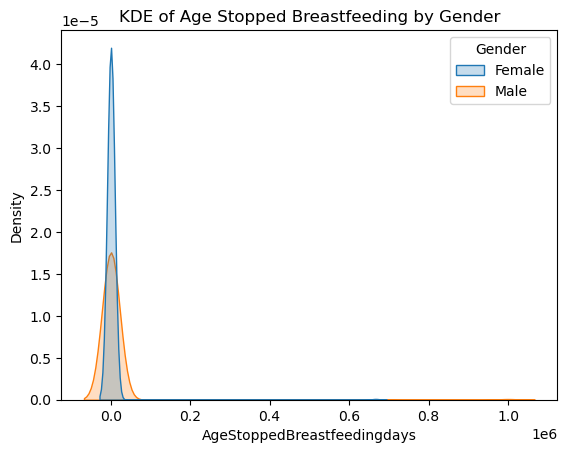

In [63]:
sns.kdeplot(data=df, x="AgeStoppedBreastfeedingdays", hue="Gender", common_norm=False, fill=True)
plt.title("KDE of Age Stopped Breastfeeding by Gender")
plt.show()

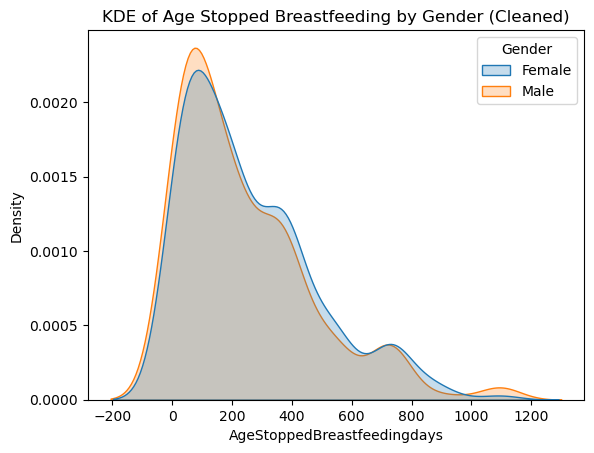

In [ ]:
# Remove implausible values (> 2000 days = ~5.5 years)
df_clean = df[df["AgeStoppedBreastfeedingdays"] < 2000]

sns.kdeplot(data=df_clean, x="AgeStoppedBreastfeedingdays", hue="Gender", common_norm=False, fill=True)
plt.title("KDE of Age Stopped Breastfeeding by Gender (Cleaned)")
plt.show()

Initial plot extended to extreme outliers on the right. This was due to coding like 999999 = “still breastfeeding” or “don’t know." I then removed the outliers that exceeded 2,000 days. This provided a more useful plot that indicates no difference between genders in length of breastfeeding, with both mostly ceasing around 6–7 months (main peak ~200 days).

I also noticed the negative values, which I discovered are an artifact of the KDE smoothing, not real data.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

# choose numeric variables (AgeStoppedBreastfeedingdays, WeightKg) to analyze

Computed bandwidth is: 8536.045339071705


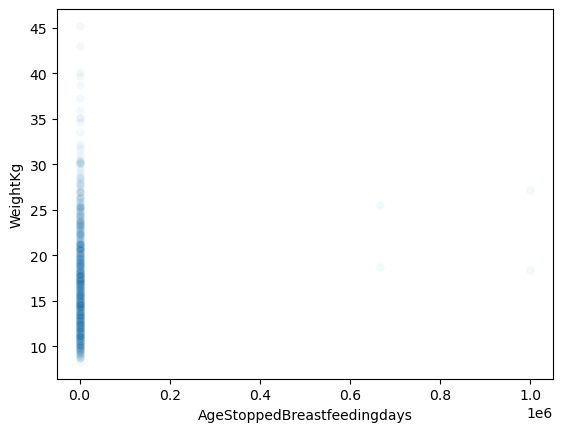

In [ ]:
x = df['AgeStoppedBreastfeedingdays']
y = df['WeightKg']

def lcls(x,y, h = None, plot=True):
    ''' Computes LCLS estimator with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute Silverman's bandwidth:
 
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1, 1) - grid.reshape(1, -1))**2
    K = np.exp(I/(2*h**2) ) / np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K 
    denominator = np.sum(K, axis = 0) 
    y_hat = numerator/denominator 

    # Plot results:
    if plot:
        sns.scatterplot(data=df, y='WeightKg', x='AgeStoppedBreastfeedingdays',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

Initial observation: Most of the points are clustered under 1000 days (~0–3 years) but the graph extends significantly to the right. Like the previous problem, AgeStoppedBreastfeedingdays includes special values like 999999 (“still breastfeeding” or “don’t know”), which stretches the x-axis way out with the outliers and makes all the real data look squished against zero. The associated bandwidth (~8536) is also huge compared to the natural scale (hundreds of days) so it over-smooths the data. Next step: filter the data to remove extreme ouliers > 1,000 days.

Computed bandwidth is: 49.47188625682484


(0.0, 1000.0)

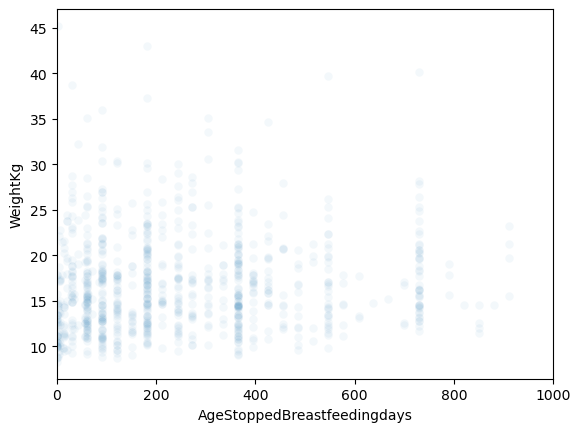

In [82]:
df_clean = df[(df["AgeStoppedBreastfeedingdays"] > 0) &
              (df["AgeStoppedBreastfeedingdays"] < 1000)]

x = df_clean["AgeStoppedBreastfeedingdays"]
y = df_clean["WeightKg"]

y_hat, grid = lcls(x, y) 
plt.xlim(0, 1000)


Observations: Weights are mostly between 10–20 kg. There’s no obvious slope left-to-right so weight doesn’t consistently increase or decrease with breastfeeding duration. This makes sense because weight at exam depends on the child’s age at that time (older kids are heavier), not just breastfeeding history. Next step: compare kids at similar ages (AgeInYearsAtScreening).

/var/folders/_j/g3w6_07d0b9gfphnq_607h_40000gn/T/ipykernel_79778/3806104899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["AgeGroup"] = pd.cut(df_clean["AgeInYearsAtScreening"], bins=bins, labels=labels, right=True)


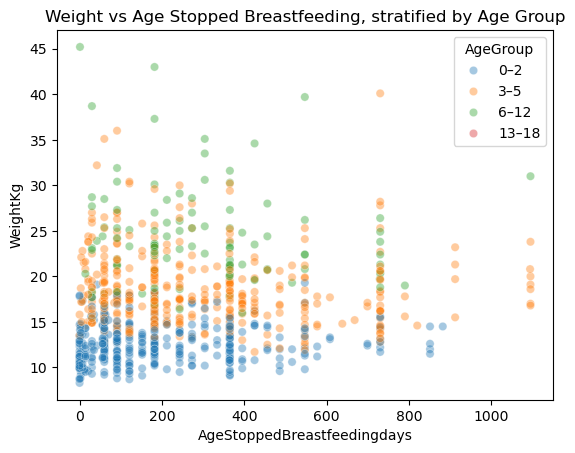

In [ ]:
# Make age groups to compare kids at similar ages (AgeInYearsAtScreening)

bins = [0, 2, 5, 12, 18]
labels = ["0–2", "3–5", "6–12", "13–18"]
df_clean = df[(df["AgeStoppedBreastfeedingdays"] > 0) &
              (df["AgeStoppedBreastfeedingdays"] < 2000)]
df_clean["AgeGroup"] = pd.cut(df_clean["AgeInYearsAtScreening"], bins=bins, labels=labels, right=True)

# Plot
sns.scatterplot(data=df_clean, 
                x="AgeStoppedBreastfeedingdays", 
                y="WeightKg", 
                hue="AgeGroup", alpha=0.4)
plt.title("Weight vs Age Stopped Breastfeeding, stratified by Age Group")
plt.show()

Updated observations: Stratifying by age group clearly illustrates the weight dependence on age at time of screening, while reinforcing the previous observation that the children's current weight shows no clear association with breastfeeding duration (flat).

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

# choose variable pair to examine (AgeInYearsAtScreening, Weight)

Computed bandwidth is: 1.0363065519176298


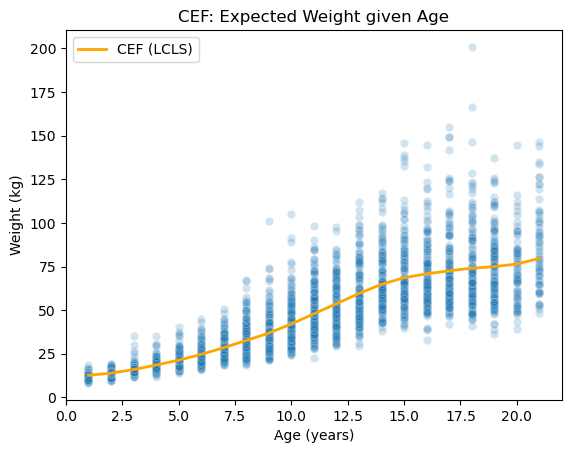

In [80]:
# Clean data to drop NaN and restrict to plausible ages (0–21)
d = df[["AgeInYearsAtScreening", "WeightKg"]].dropna()
d = d[(d["AgeInYearsAtScreening"] >= 0) & (d["AgeInYearsAtScreening"] <= 21)]

# Conditional Expectation Function (CEF) with LCLS smoother
y_hat, grid = lcls(d["AgeInYearsAtScreening"], d["WeightKg"], plot=False)

sns.scatterplot(data=d, x="AgeInYearsAtScreening", y="WeightKg", alpha=0.2)
sns.lineplot(x=grid, y=y_hat, color="orange", linewidth=2, label="CEF (LCLS)")

plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("CEF: Expected Weight given Age")
plt.legend()
plt.show()

The relationship between age at screening and body weight (generally increasing, though not perfectly linear) is plausibly causal. Children get older and grow -- age temporally precedes and drives weight gain, at least in this stage of life (unlike later in life, when aging can be associated with weight loss in the elderly).

Omitted variables such as diet, socioeconomic status, or gender may affect the level of weight, but they do not undermine the fundamental biological fact that children gain weight as they age. These factors may change the slope or dispersion of the relationship, but not its direction.

Regardless of potential threats to causal identification, the CEF is descriptive (summarizes the average weight expected for a given age in the observed data). Even if we cannot strictly claim that age “causes” weight, the model can still make accurate predictions about weight conditional on age — as long as we are not applying interventions that defy biological or social norms (like forcing children to gain/lose weight outside natural growth patterns).